In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle, Circle

### Ultrasonic transducers
* real transducers are a collection of "point sources"
    * constructive and destructive interferrence
* there are 2 zones of the ultrasonic beam propagation
    1. Near-field: fluctuations in sound intensity near transducer
    2. Far-field: can think of this like a flashlight beam:

### Beam spreading
* Near-field beam width: $\frac{D^2}{4 \lambda}$
* Far-field divergence angle: $\delta = \arcsin(\frac{1.22 \lambda}{D})$  
where $D = $transducer diameter, $\lambda = \frac{v}{f}$

In [2]:
def nearField(dia, vel, freq):
    wavlen = vel/freq
    fresnel_l = dia**2 / (4*wavlen)
    return fresnel_l

def farField(dia, vel, freq):
    wavlen = vel/freq
    delta = np.arcsin(0.514 * wavlen/dia)
    return delta

In [3]:
samp_th = 26.23 #mm
short_th = 11.5 #mm
short_h = 49.64 #mm
short_w = 45.01 #mm
tall_h = 68.12 #mm

pzt_dia = 6.5 #mm
pzt_th = 4 #mm

near = nearField(pzt_dia*1e-3, 4.3e3, 5e5)*1e3
far = farField(pzt_dia*1e-3, 4.3e3, 5e5)

centersz = 15.494*np.arange(3) + 9.412
centersx = 12.7*np.arange(3) + 9.8
centersz, centersx

(array([ 9.412, 24.906, 40.4  ]), array([ 9.8, 22.5, 35.2]))

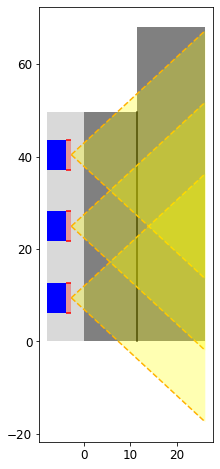

Near-field: 1.23mm
Far-field beam spread angle: 85.7deg
Far-field beam spread diameter @ fracture: 26.48mm


In [4]:
samp_th_arr = np.linspace(0,samp_th-near+4,100)
near_arr = np.linspace(0,near,100)
far_arr = np.linspace(0,np.tan(far)*(samp_th-near+4),100)

#------------------------------------------------------------

fig = plt.figure(figsize=(5,8))
mpl.rcParams.update({'font.size': 12})
ax1 = fig.add_subplot(111)
ax1.set_aspect(1)

ax1.add_patch(Rectangle((-8, 0), 8, short_h, facecolor=[0.85,0.85,0.85]))
ax1.add_patch(Rectangle((0, 0), short_th, short_h, facecolor='gray'))
ax1.add_patch(Rectangle((short_th, 0), samp_th - short_th, tall_h, facecolor='gray'))
ax1.plot([short_th, short_th],[short_h, 0], color='k')

for aa in range(3):

    short_h_arr = np.linspace(centersz[aa],centersz[aa],100)
    pzt_dia_arr = np.linspace(centersz[aa]-pzt_dia/2,centersz[aa]-pzt_dia/2,100)

    ax1.add_patch(Rectangle((0-pzt_th, centersz[aa]-pzt_dia/2), -pzt_th, pzt_dia, facecolor='blue', zorder=4))

    ax1.plot(near_arr-4, pzt_dia_arr, color='r', ls='--')
    ax1.plot(near_arr-4, pzt_dia_arr+pzt_dia, color='r', ls='--')
    ax1.fill_between(near_arr-4, pzt_dia_arr, pzt_dia_arr+pzt_dia, alpha=0.3, facecolor='red', zorder=2)

    ax1.plot(samp_th_arr+near-4, short_h_arr-far_arr, color='orange', ls='--')
    ax1.plot(samp_th_arr+near-4, short_h_arr+far_arr, color='orange', ls='--')
    ax1.fill_between(samp_th_arr+near-4, short_h_arr+far_arr, short_h_arr-far_arr, alpha=0.3, facecolor='yellow', zorder=3)

plt.show()

print('Near-field: '+str(round(near,2))+'mm')
print('Far-field beam spread angle: '+str(round(np.rad2deg(2*far),2))+"deg")
print('Far-field beam spread diameter @ fracture: '+str(round(2*np.tan(far)*(short_th-near+4),2))+"mm")

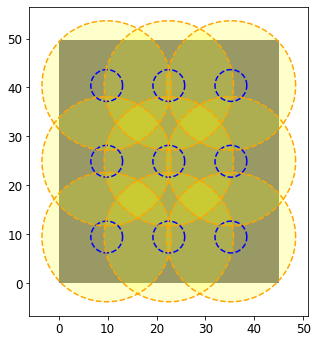

In [5]:
fig = plt.figure(figsize=(5,8))
mpl.rcParams.update({'font.size': 12})
ax1 = fig.add_subplot(111)
ax1.set_aspect(1)

theta = np.linspace(0 ,2*np.pi , 100)  
radius = np.tan(far)*(short_th-near+4)
  
a = radius * np.cos(theta)
b = radius * np.sin(theta)  

ax1.add_patch(Rectangle((0, 0), short_w, short_h, facecolor='gray'))

for aa in range(3):
    for bb in range(3):
        ax1.plot(a+centersx[bb], b+centersz[aa], color='orange', linestyle='--')
        ax1.plot((pzt_dia/2*a/radius)+centersx[bb], (pzt_dia/2*b/radius)+(centersz[aa]), color='blue', linestyle='--')

        ax1.fill_between(a+centersx[bb], b+centersz[aa], fc='yellow', alpha=0.2, zorder=2)

plt.show()

# print('Near-field: '+str(round(near,2))+'mm')
# print('Far-field beam spread angle: '+str(round(np.rad2deg(2*far),2))+"deg")
# print('Far-field beam spread diameter @ fracture: '+str(round(2*np.tan(far)*(short_th-near+4),2))+"mm")

In [6]:
far_steel = farField(pzt_dia*1e-3, 5.9e3, 5e5)
Beta = np.tan(far_steel)

alpha = np.arcsin(4.5e3 * np.sin(np.pi/2 - far)/ 5.9e3)
alpha

0.5934036703512845

In [7]:
np.rad2deg(far_steel)

68.92454877273029

In [8]:
2*np.tan(np.arcsin(4.5e3 * np.cos(far_steel)/ 5.9e3))*11.5

6.559731253827811

In [9]:
np.rad2deg(np.arcsin(4.5e3 * np.cos(far_steel)/ 5.9e3))

15.91845205387876

In [18]:
snell_dia = np.tan(far_steel)*(4-near)*2 + 2*np.tan(np.arcsin(4.5e3 * np.sin(np.pi/2 - far_steel)/ 5.9e3))*11.5
snell_dia2 = np.tan(far_steel)*(4-near)*2 - 2*np.tan(np.arcsin(4.5e3 * np.sin(np.pi/2 - far_steel)/ 5.9e3))*11.5
snell_dia, snell_dia2


(20.944666334268735, 7.825203826613117)

In [11]:
def snell(dia, vel, freq):
    wavlen = vel/freq
    delta = np.arcsin(0.514 * wavlen/dia)
    return delta

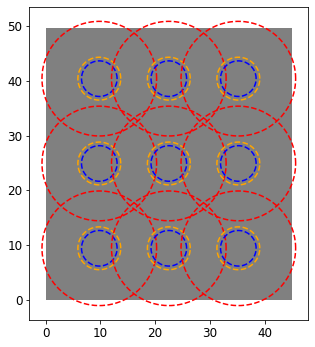

In [20]:
fig = plt.figure(figsize=(5,8))
mpl.rcParams.update({'font.size': 12})
ax1 = fig.add_subplot(111)
ax1.set_aspect(1)

theta = np.linspace(0 ,2*np.pi , 100)  
radius = np.tan(far)*(short_th-near+4)
  
a = radius * np.cos(theta)
b = radius * np.sin(theta)  
    
a2 = snell_dia/2 * np.cos(theta)
b2 = snell_dia/2 * np.sin(theta)  

a3 = snell_dia2/2 * np.cos(theta)
b3 = snell_dia2/2 * np.sin(theta)  

ax1.add_patch(Rectangle((0, 0), short_w, short_h, facecolor='gray'))

for aa in range(3):
    for bb in range(3):
#         ax1.plot(a+centersx[bb], b+centersz[aa], color='orange', linestyle='--')
        ax1.plot(a3+centersx[bb], b3+centersz[aa], color='orange', linestyle='--')
        ax1.plot(a2+centersx[bb], b2+centersz[aa], color='red', linestyle='--')
        ax1.plot((pzt_dia/2*a/radius)+centersx[bb], (pzt_dia/2*b/radius)+(centersz[aa]), color='blue', linestyle='--')
#         ax1.fill_between(a+centersx[bb], b+centersz[aa], fc='yellow', alpha=0.2, zorder=2)

plt.show()

# print('Near-field: '+str(round(near,2))+'mm')
# print('Far-field beam spread angle: '+str(round(np.rad2deg(2*far),2))+"deg")
# print('Far-field beam spread diameter @ fracture: '+str(round(2*np.tan(far)*(short_th-near+4),2))+"mm")